In [1]:

import pandas as pd
full_data = pd.read_csv('C:\\Users\\ilihas\\OneDrive\\Desktop\\BE PROJECT\\Weather Data1 - Copy.csv')
full_data.head()

,Dates,Max-Temp,Min-temp,Hum-max,Hum-min,Evaporation,Average Wind Speed,Rainfall
0,01-01-2022,25.5,13.8,94.0,NaN,2.2,1.5,0.0
1,02-01-2022,32.4,18.0,78.0,56.1,5.4,2.4,NaN
2,03-01-2022,27.5,13.5,88.0,55.0,2.7,2.4,0.0
3,04-01-2022,28.0,13.6,89.0,52.0,3,0.2,0.0
4,05-01-2022,29.2,13.2,90.0,48.0,3.2,2.7,0.0


In [2]:
full_data.isnull().sum()

Dates                  0
Max-Temp               0
Min-temp               0
Hum-max                0
Hum-min                8
Evaporation            0
Average Wind Speed     2
Rainfall              42
dtype: int64

In [3]:
full_data['Hum-min'].fillna(value=full_data['Hum-min'].mean(),inplace=True)
full_data['Average Wind Speed'].fillna(value=full_data['Average Wind Speed'].mean(),inplace=True)
full_data['Rainfall'].fillna(value=0.0,inplace=True)

In [4]:
full_data.isnull().sum()

Dates                 0
Max-Temp              0
Min-temp              0
Hum-max               0
Hum-min               0
Evaporation           0
Average Wind Speed    0
Rainfall              0
dtype: int64

In [5]:
oversampled=full_data

In [6]:
oversampled.head()

,Dates,Max-Temp,Min-temp,Hum-max,Hum-min,Evaporation,Average Wind Speed,Rainfall
0,01-01-2022,25.5,13.8,94.0,56.131036,2.2,1.5,0.0
1,02-01-2022,32.4,18.0,78.0,56.100000,5.4,2.4,0.0
2,03-01-2022,27.5,13.5,88.0,55.000000,2.7,2.4,0.0
3,04-01-2022,28.0,13.6,89.0,52.000000,3,0.2,0.0
4,05-01-2022,29.2,13.2,90.0,48.000000,3.2,2.7,0.0


In [7]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [10]:
MiceImputed.head()

,Dates,Max-Temp,Min-temp,Hum-max,Hum-min,Evaporation,Average Wind Speed,Rainfall
0,0,25.5,13.8,94.0,56.131036,22,1.5,0.0
1,12,32.4,18.0,78.0,56.100000,48,2.4,0.0
2,24,27.5,13.5,88.0,55.000000,25,2.4,0.0
3,36,28.0,13.6,89.0,52.000000,27,0.2,0.0
4,48,29.2,13.2,90.0,48.000000,29,2.7,0.0


In [11]:
MiceImputed.isnull().any()

Dates                 False
Max-Temp              False
Min-temp              False
Hum-max               False
Hum-min               False
Evaporation           False
Average Wind Speed    False
Rainfall              False
dtype: bool

In [12]:

MiceImputed.isnull().any()

Dates                 False
Max-Temp              False
Min-temp              False
Hum-max               False
Hum-min               False
Evaporation           False
Average Wind Speed    False
Rainfall              False
dtype: bool

In [13]:
MiceImputed.shape

(365, 8)

<Axes: >

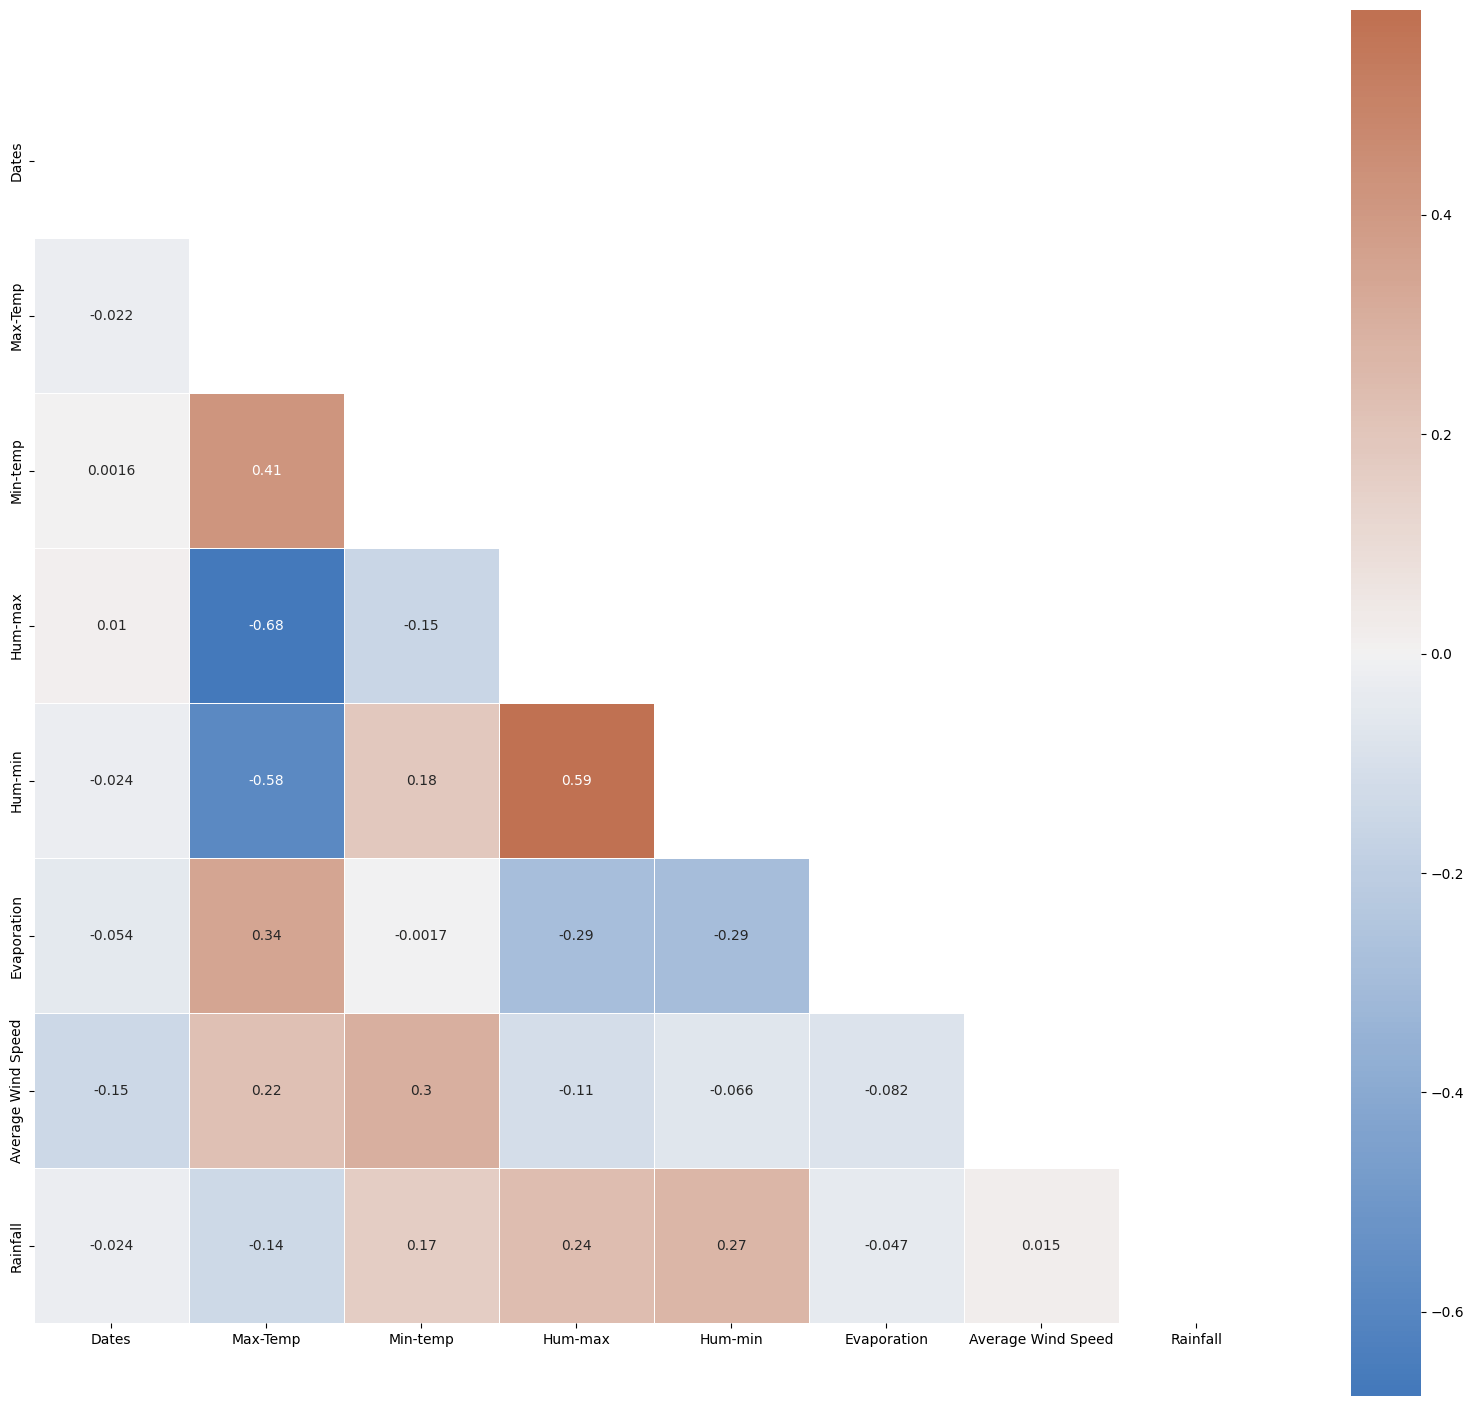

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [15]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

,Dates,Max-Temp,Min-temp,Hum-max,Hum-min,Evaporation,Average Wind Speed,Rainfall
0,0.000000,0.097826,0.319527,0.904762,0.483895,0.293333,0.096154,0.0
1,0.032967,0.472826,0.568047,0.650794,0.483529,0.640000,0.153846,0.0
2,0.065934,0.206522,0.301775,0.809524,0.470588,0.333333,0.153846,0.0
3,0.098901,0.233696,0.307692,0.825397,0.435294,0.360000,0.012821,0.0
4,0.131868,0.298913,0.284024,0.841270,0.388235,0.386667,0.173077,0.0


In [16]:
modified_data['Rainfall'].unique()

array([0.        , 0.05      , 0.02692308, 0.15769231, 0.08076923,
       0.00192308, 0.01538462, 0.01153846, 0.10769231, 0.00769231,
       0.11923077, 0.19615385, 0.06538462, 0.04230769, 0.17307692,
       0.02307692, 0.05384615, 0.04615385, 0.00384615, 0.18076923,
       0.17692308, 0.5       , 0.16923077, 0.19230769, 0.11538462,
       0.10384615, 0.08846154, 0.03076923, 0.21153846, 0.01923077,
       0.14615385, 0.13846154, 0.15      , 0.03461538, 0.16538462,
       0.06730769, 1.        , 0.15384615, 0.00961538])

In [17]:
data=MiceImputed

In [18]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

X = data[['Max-Temp', 'Min-temp', 'Hum-max', 'Hum-min', 'Evaporation', 'Average Wind Speed']]  # Features
y = data['Rainfall'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
model=XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 123)

In [20]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [21]:
y_pred=model.predict([[30,17,95,43,2.5,14]])
water=(y_pred/1000)*(4046.86)*1000
print("predicted Rainfall for one day ",y_pred)
print("The Rainfall of the day in litre in 1 acre region ",water)
req=(5.5/1000)*(4046.86)*1000
print("Required water in liters for one day in 1 acre ",req)
print("The water in liters to be supplied will be ",req-water)

predicted Rainfall for one day  [1.7037175]
The Rainfall of the day in litre in 1 acre region  [6894.706]
Required water in liters for one day in 1 acre  22257.73
The water in liters to be supplied will be  [15363.024]
